### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
amazon_df = pd.read_csv(r"C:\Users\sofia\Documents\Data_Analytics_Ironhack\Labs\amz_uk_price_prediction_dataset.csv")

amazon_df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [4]:
crosstab_result = pd.crosstab(amazon_df['category'], amazon_df['isBestSeller'])

crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [5]:
# Total sum of products by category (row)
category_totals = crosstab_result.sum(axis=1)

# Best-sellers propostion by category
crosstab_result['best_seller_ratio'] = crosstab_result[True] / category_totals

# Sort descending
sorted_best_seller_ratio = crosstab_result.sort_values(by='best_seller_ratio', ascending=False)

print(sorted_best_seller_ratio[['best_seller_ratio']].head(10))  # top 10


isBestSeller                    best_seller_ratio
category                                         
Grocery                                  0.058135
Smart Home Security & Lighting           0.057692
Health & Personal Care                   0.057686
Mobile Phone Accessories                 0.042471
Power & Hand Tools                       0.035339
Billiard, Snooker & Pool                 0.032129
Pet Supplies                             0.030200
Home Brewing & Wine Making               0.028455
Wind Instruments                         0.028000
Mirrors                                  0.028000


**Answer to Exercise 1:** The analysis revealed that some categories have a much higher proportion of best-sellers compared to others. After filtering out categories with very few products, we found that "Grocery" had the highest ratio, with approximately 5,8% of its products marked as best-sellers. This suggests that products in this category are either in higher demand or face less competition.

2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

In [6]:
from scipy.stats import chi2_contingency

# Chi-square test for 'Category' and 'isBestSeller'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(36684.23786636857, 0.0)

p-value = 0.0 this means that there is a significant association between these two categorical variables

In [7]:
from scipy.stats.contingency import association

crosstab_clean = crosstab_result.drop(columns='best_seller_ratio')

# Computing the association between variables in 'crosstab_result' using the "cramer" method
cramers_v = association(crosstab_clean, method="cramer")
print("Cramér's V:", round(cramers_v, 4))

Cramér's V: 0.1223


**Answer to Exercise 2**: Cramer's V is equal to 0.1223 this means that there is a weak association between the two variables. It’s statistically significant, but in real terms, the connection isn’t particularly strong.


3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

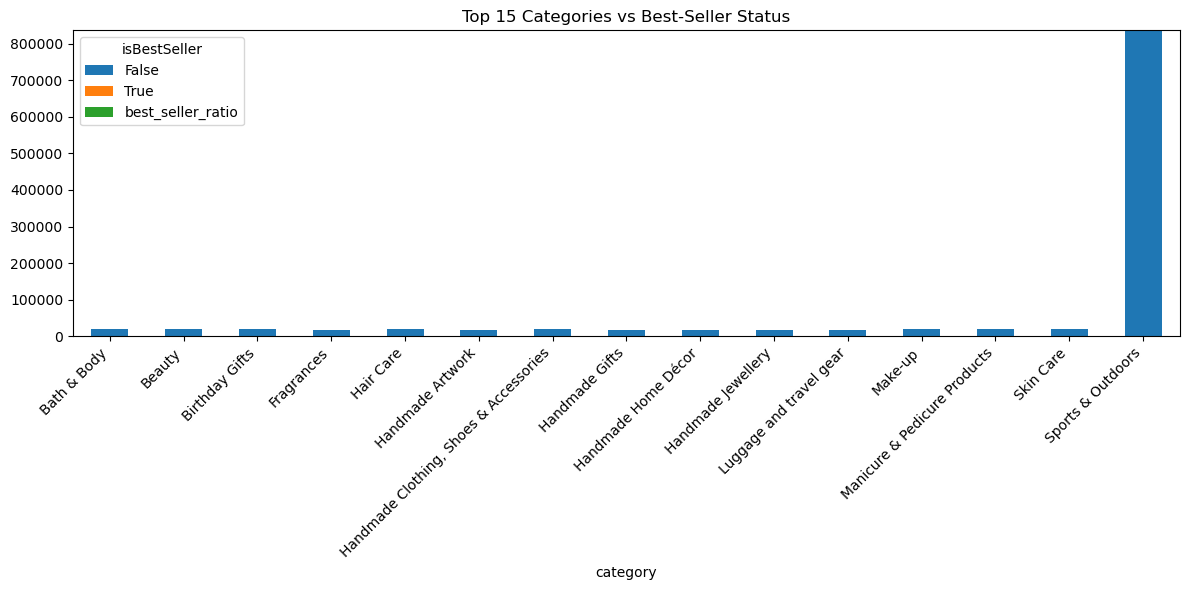

In [8]:
# Plotting a stacked bar chart for the 'crosstab_result' data
top_categories = amazon_df['category'].value_counts().head(15).index
top_crosstab = crosstab_result.loc[crosstab_result.index.isin(top_categories)]

top_crosstab.plot(kind="bar", stacked=True, figsize=(12,6))
plt.xticks(rotation=45, ha='right')
plt.title("Top 15 Categories vs Best-Seller Status")
plt.tight_layout()
plt.show()


In [9]:
print(sorted_best_seller_ratio.columns)


Index([False, True, 'best_seller_ratio'], dtype='object', name='isBestSeller')


In [10]:
top_ratio = crosstab_result.sort_values('best_seller_ratio', ascending=False).head(15)
top_ratio

isBestSeller,False,True,best_seller_ratio
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
"Billiard, Snooker & Pool",241,8,0.032129
Pet Supplies,9152,285,0.030200
Home Brewing & Wine Making,239,7,0.028455
Wind Instruments,243,7,0.028000


In [11]:
print(top_ratio.columns)


Index([False, True, 'best_seller_ratio'], dtype='object', name='isBestSeller')


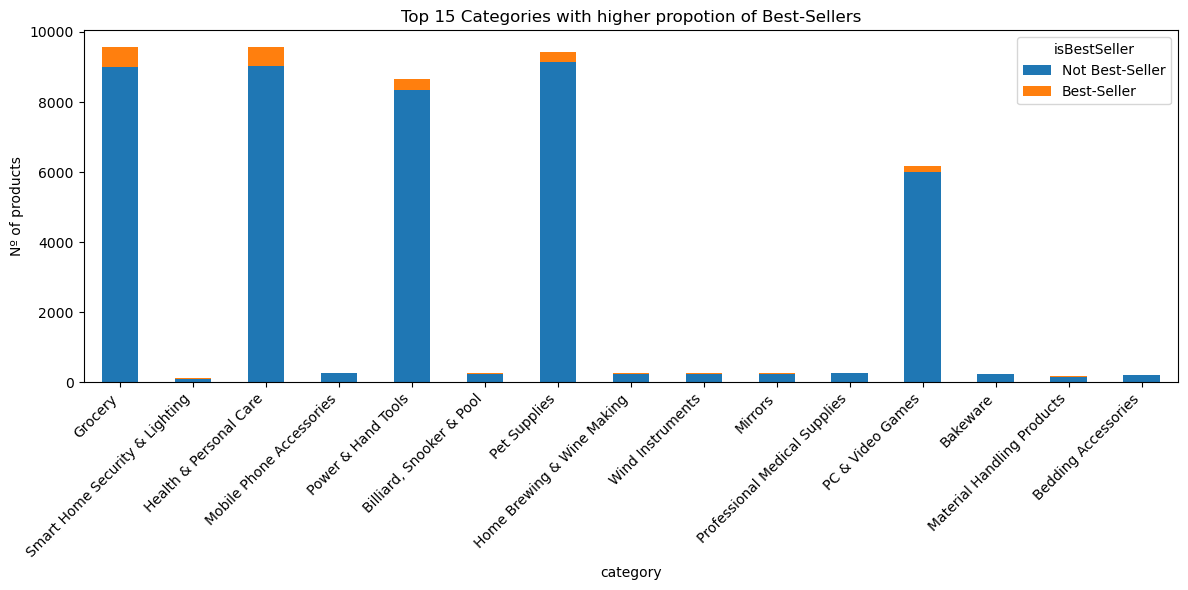

In [12]:
renamed = top_ratio.rename(columns={True: 'Best-Seller', False: 'Not Best-Seller'})

renamed[['Not Best-Seller', 'Best-Seller']].plot(kind="bar", stacked=True, figsize=(12,6))
plt.xticks(rotation=45, ha='right')
plt.title("Top 15 Categories with higher propotion of Best-Sellers")
plt.ylabel("Nº of products")
plt.tight_layout()
plt.show()


### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

In [13]:
def tukeys_test_outliers(data_columns):
    Q1 = data_columns.quantile(0.25)
    Q3 = data_columns.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data_columns[(data_columns < lower_bound) | (data_columns > upper_bound)]
    
    return outliers

outliers_price = tukeys_test_outliers(amazon_df['price'])
print(outliers_price)

10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64


In [14]:
Q1 = amazon_df['price'].quantile(0.25)
Q3 = amazon_df['price'].quantile(0.75)
IQR = Q3 - Q1

# Limites para considerar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
    


amazon_clean = amazon_df[(amazon_df['price'] >= lower_bound) & (amazon_df['price'] <= upper_bound)]
amazon_clean

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [15]:
amazon_clean = amazon_df[(amazon_df['price'] >= lower_bound) & (amazon_df['price'] <= upper_bound)]
amazon_clean

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [16]:
print(f"Original dataset: {len(amazon_df)} rows")
print(f"Cleaned dataset: {len(amazon_clean)} rows")
print(f"Outliers removed: {len(amazon_df) - len(amazon_clean)} rows")

Original dataset: 2443651 rows
Cleaned dataset: 2115963 rows
Outliers removed: 327688 rows


1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

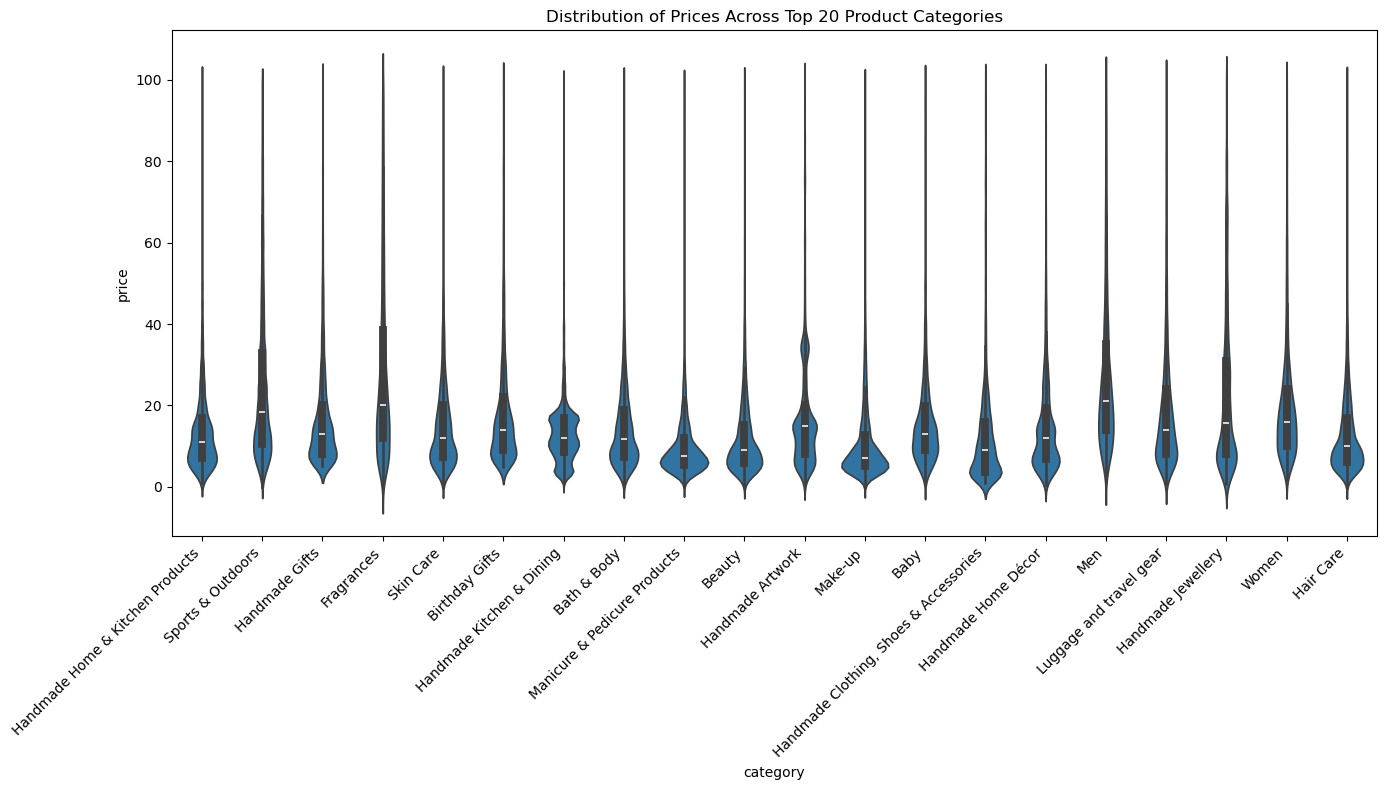

In [17]:
top_20_categories = amazon_clean['category'].value_counts().head(20).index
df_top20 = amazon_clean[amazon_clean['category'].isin(top_20_categories)]



plt.figure(figsize=(14, 8))
sns.violinplot(data=df_top20, x='category', y='price')
plt.xticks(rotation=45, ha='right')
plt.title("Distribution of Prices Across Top 20 Product Categories")
plt.tight_layout()
plt.show()


In [18]:
median_prices = amazon_clean.groupby('category')['price'].median().sort_values(ascending=False)
print(median_prices.head(10))  # Top 10 categories with higher median


category
Desktop PCs               74.00
Boxing Shoes              69.79
Tablets                   69.00
Graphics Cards            68.54
Motherboards              67.92
Made in Italy Handmade    64.00
Digital Frames            63.90
Streaming Clients         62.68
Golf Shoes                62.39
Ski Helmets               61.33
Name: price, dtype: float64


Answer question 1 (part 2): Among all product categories, the one with the highest median price is Desktop PCs, based on the full dataset without outliers. This suggests that products in this category are consistently priced higher than others, regardless of variation.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

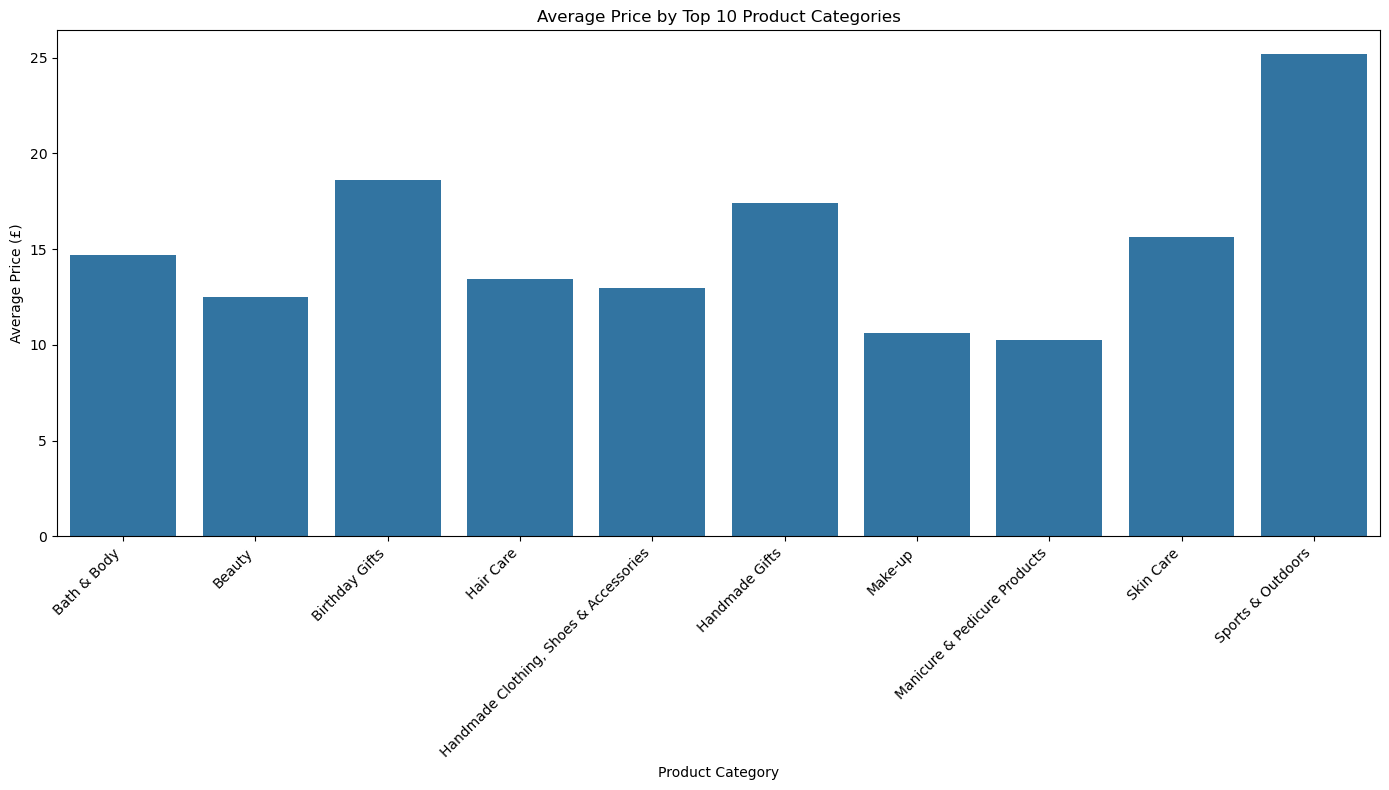

In [28]:
top_10_categories = amazon_clean['category'].value_counts().head(10).index
df_top10 = amazon_clean[amazon_clean['category'].isin(top_10_categories)]

avg_price = df_top10.groupby('category')["price"].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=avg_price, x='category', y='price')
plt.xticks(rotation=45, ha='right')
plt.title("Average Price by Top 10 Product Categories")
plt.ylabel("Average Price (£)")
plt.xlabel("Product Category")
plt.tight_layout()
plt.show()

In [34]:
highest_avg_price = amazon_clean.groupby('category')['price'].mean().sort_values(ascending=False)
print(highest_avg_price.head(1))


category
Motherboards    68.772432
Name: price, dtype: float64


Answer to question 2: with this bar chart we can conclude that the category "Sports & Outdoors" stands out regarding the price. Meaning that products on this category tend to be higher. However, when searching for the category with the highest price average, we can see that is Motherboards (68.77£)

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

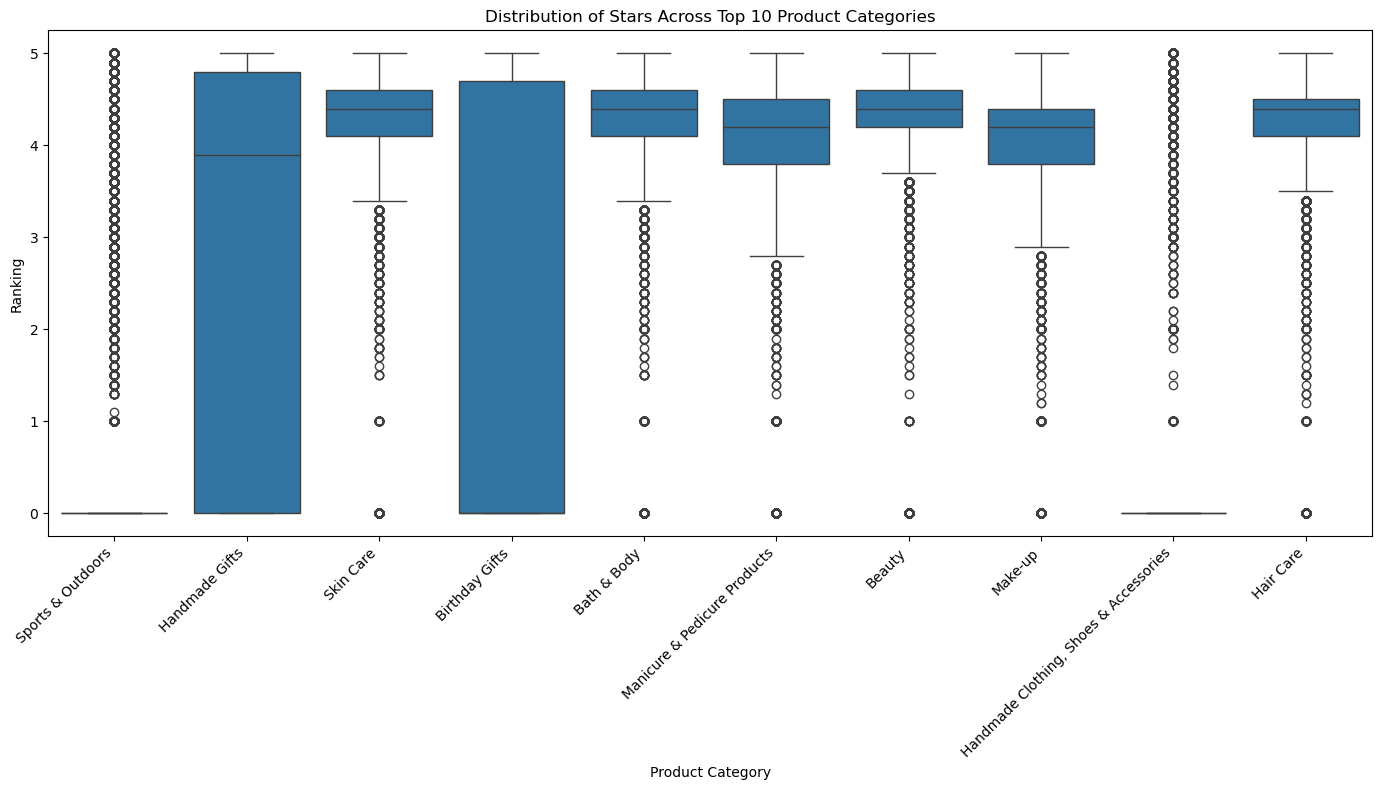

In [33]:
top_10_categories = amazon_clean['category'].value_counts().head(10).index
df_top10 = amazon_clean[amazon_clean['category'].isin(top_10_categories)]


plt.figure(figsize=(14, 8))
sns.boxplot(data=df_top10, x='category', y='stars')
plt.xticks(rotation=45, ha='right')
plt.title("Distribution of Stars Across Top 10 Product Categories")
plt.ylabel("Ranking")
plt.xlabel("Product Category")
plt.tight_layout()
plt.show()

In [31]:
amazon_clean.groupby("category")["stars"].median().sort_values(ascending=False).head(5)


category
Computer Memory                 4.7
Building & Construction Toys    4.6
Office Paper Products           4.6
Luxury Food & Drink             4.6
Kids' Play Figures              4.6
Name: stars, dtype: float64

Answer to question 3: Some categories stand out by its consistency and quality perceived by clients - as Computer Memory, Building & Construction Toys and Luxury Food & Drink - all with high raking median (>4.6). 

The boxplots show that, despite some categories present high medians, the evaluation dispersion can change significantly. Some have more concentraded evaluations (meaning bigger consistency), while others present more outliers and variability - this can indicate that products with different performance within the same category.

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?



In [ ]:
# Calculating the Pearson correlation coefficient
correlation_pearson = amazon_clean['price'].corr(amazon_clean['stars'])
correlation_pearson

-0.07767299878158346

In [ ]:
# Calculating the Spearman rank correlation 
correlation_spearman = amazon_clean['price'].corr(amazon_clean['stars'], method='spearman')
correlation_spearman

-0.0667969728076531

Answer to question 1: Both correlations are negative, this indicates a very weak inverse relationship. In practice, this means that more expensive products may receive lower ratings, but the effect is minimal and not praically significant.

2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

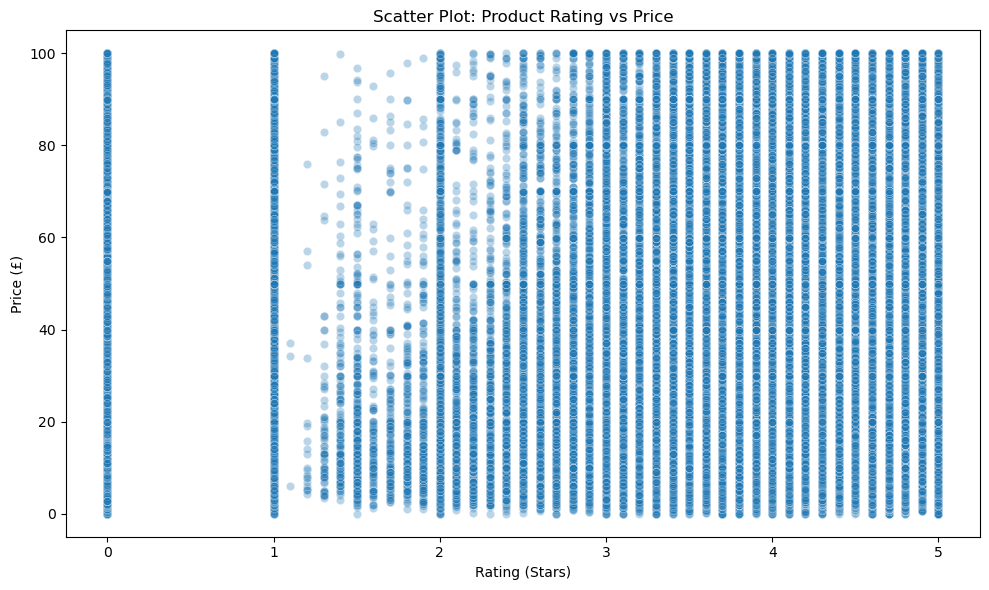

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=amazon_clean, x='stars', y='price', alpha=0.3)
plt.title("Scatter Plot: Product Rating vs Price")
plt.xlabel("Rating (Stars)")
plt.ylabel("Price (£)")
plt.tight_layout()
plt.show()


In [39]:
print(amazon_clean.columns)


Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

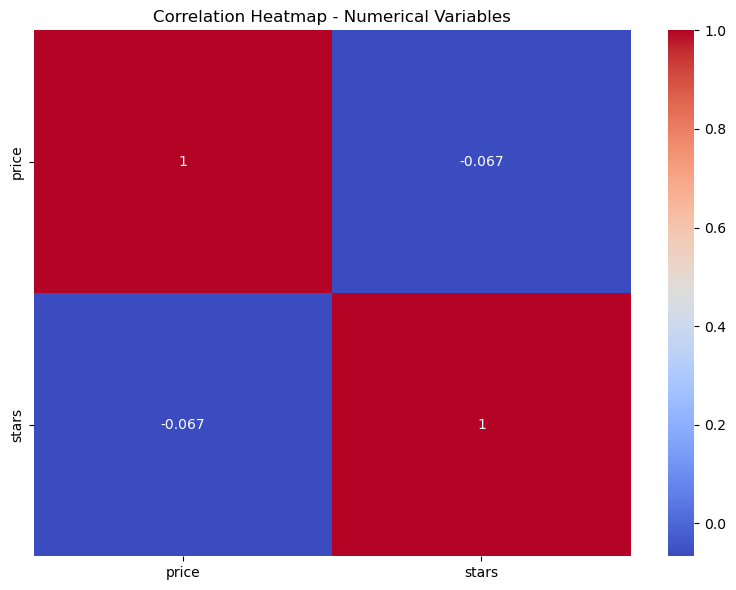

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(amazon_clean[['price', 'stars']].corr(method='spearman'), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Numerical Variables")
plt.tight_layout()
plt.show()

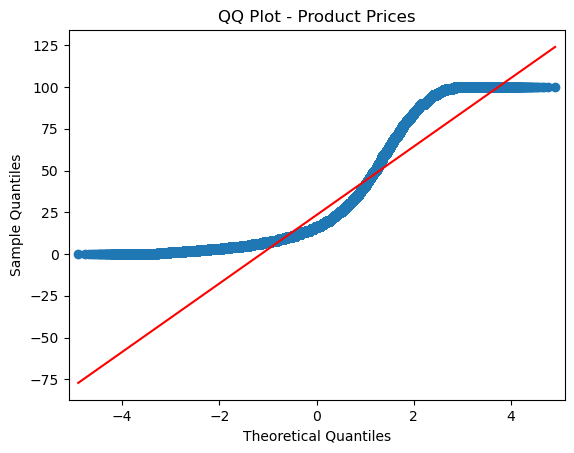

In [41]:
from scipy import stats
import statsmodels.api as sm

sm.qqplot(amazon_clean["price"], line='s')
plt.title("QQ Plot - Product Prices")
plt.show()


Answer to question 2:
Scatter Plot: big amount of data between ranking 4 and 5 and with prices under 100€. Too much accumulated points near 5 stars ranking. Some prices are extremly high. There is no strong correlation, this confirms the correlations results.
Heatmap: the heatmap show the weak correlation
QQPlot: this chart reveals that product prices do not follow a normal distribution. They exhibit positive skewness, with a concentration of lower-priced items and a long right tail of high-priced outliers.

**Bonus!**

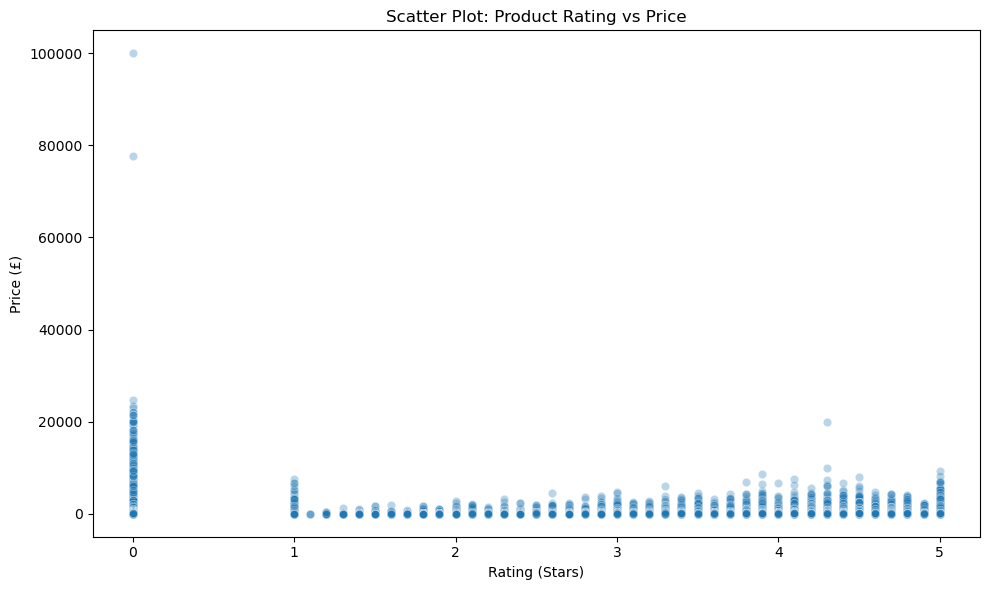

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=amazon_df, x='stars', y='price', alpha=0.3)
plt.title("Scatter Plot: Product Rating vs Price")
plt.xlabel("Rating (Stars)")
plt.ylabel("Price (£)")
plt.tight_layout()
plt.show()

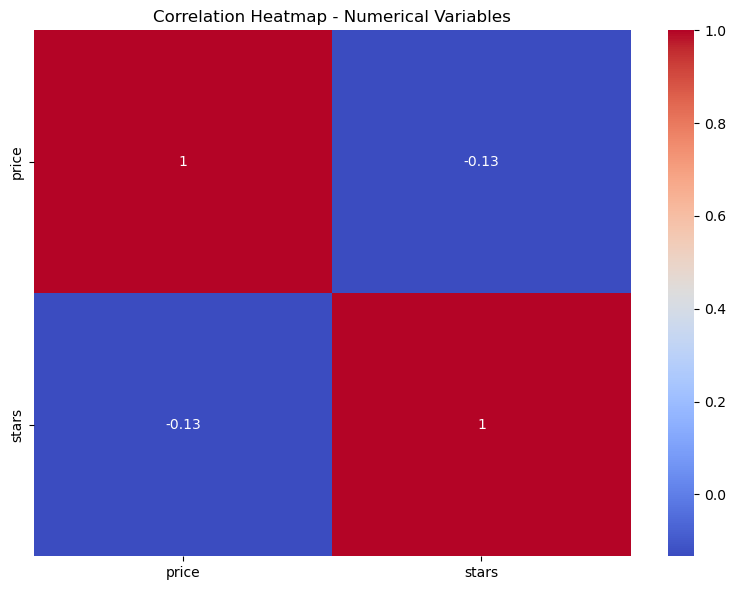

In [46]:
plt.figure(figsize=(8, 6))
sns.heatmap(amazon_df[['price', 'stars']].corr(method='spearman'), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Numerical Variables")
plt.tight_layout()
plt.show()

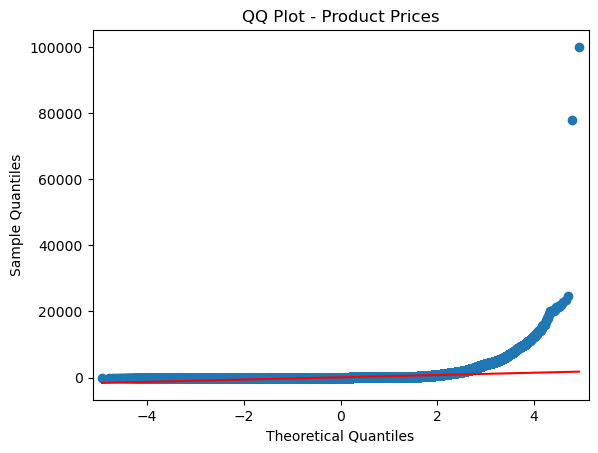

In [47]:
from scipy import stats
import statsmodels.api as sm

sm.qqplot(amazon_df["price"], line='s')
plt.title("QQ Plot - Product Prices")
plt.show()


When we don't remove the outliers, we can observe some differences:
1. Outliers with the higher prices are the one that don't have any evaluation.
2. The heatmap, actualy proves the negativat of the correlations, meaning  expensive products tend to have lower ranking
3. Until TQ = 2, prices have a normal distribution, as the points follow the red line.